#### 6_RandomForest_Regressor.ipynb

## Random Forest Regressor (랜덤 포레스트 회귀)
- 여러 개의 결정 트리(Decision Tree)를 만들고, \
  각 트리의 예측값의 **평균**을 최종 예측값으로 사용하는 앙상블 모델
- 과적합(Overfitting)을 방지하고 예측 성능을 높이는 데 효과적임
- 데이터 스케일링이 필요 없음 (트리 기반 모델의 특징)

### *개념체크*
- 과적합(Overfitting) : 훈련 데이터에 너무 맞춰져서 노이즈까지 외워버린 상태. 새로운 데이터에서 성능이 떨어지는 현상.
- 노이즈(Noise) : 데이터에서 원래 패턴이 아닌 우연한 흔들림 또는 잡음. 예측과 상관없는 요소들이 섞여있는 상태를 의미함.
- 트리 모델에서 스케일링이 필요 없는 이유
  : 트리 모델은 거리나 크기 비교를 하지 않고,\
    특성 값을 기준으로 **데이터를 둘로 나누는 분기점(split point)** 만 찾기 때문에 특성 값의 크기가 달라도 모델 성능에 영향을 주지 않음

In [1]:
import numpy as np

# 샘플 데이터 => 선형 회귀 샘플 + 노이즈
x = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([5.2, 7.1, 8.8, 11.3, 13.0, 15.1, 17.2, 19.0])
# => y=2x+3 을 따르는 약한 선형 관계..!

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)
# * n_estimators : 랜덤 포레스트가 만들 트리 개수. 기본값 100.
#                  클수록 성능이 좋아지지만, 시간이 오래걸림.

model.fit(x, y)

y_pred = model.predict(x)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print('----- * Random Forest Regressor * -----')
print(f'r2 : {r2:.2f}')
print(f'mse :  {mse:.2f}')

----- * Random Forest Regressor * -----
r2 : 0.97
mse :  0.57


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x, y, label='Output Value')
plt.plot(x, y_pred, color='red', marker='o', linestyle='--', alpha=0.7, label='Prediction Value')

plt.xlabel('Input Value')
plt.ylabel('Target Value')

plt.grid(True)
plt.legend()

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

---

In [ ]:
# 당뇨병 데이터셋
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2, random_state=42)

### *파이썬 문법 체크*
- 다중 할당 (Multiple Assignment)
  - 한 줄에 여러 변수를 한꺼번에 할당할 수 있는 문법
  - ex) a, b = 10, 20\
        위의 식은 a=10, b=20 과 같은 의미
  - 겉으로 보이는 문장 구조
- 튜플 언패킹 (Tuple Unpacking)
  - 오른쪽 값들이 튜플 형태로 평가된 후,\
    그 값을 풀어서(unpack) 각각 변수에 나누어 담는 방식
  - ex) a, b = (10, 20)
  - 파이썬 내부에서 수행되는 동작

*x,y = iris.data,iris.target*
- 튜플 언패킹을 사용한 다중할당!

In [ ]:
# * 모델 생성, 학습

# --랜덤포레스트회귀 모델--
# 빠른 실행을 위해 트리 개수를 10개로 지정
model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
# * max_depth=3 : 트리의 깊이를 3으로 제한. 시각화할 때도 적용되는 옵션

model.fit(x_train, y_train)

# * 예측, 평가(r2, mse)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'r2 : {r2:.2f}')
print(f'mse : {mse:.2f}')

r2 : 0.43
mse : 3036.87


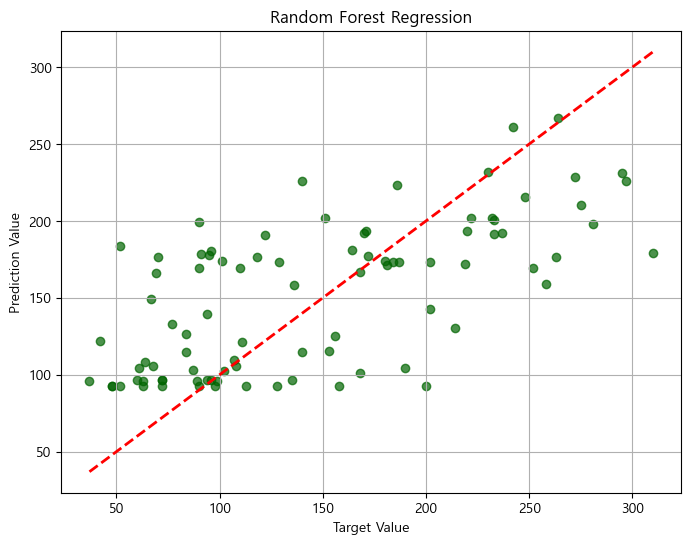

In [ ]:
# 실제값과 예측값 시각화
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, color='darkgreen', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Random Forest Regression')
plt.xlabel('Target Value')
plt.ylabel('Prediction Value')

plt.grid(True)

In [ ]:
# * 첫 번째 트리 추출 및 시각화

# Random Forest는 앙상블이므로, 숲(forest)에서 첫 번재 트리(인덱스 0)를 선택
tree = model.estimators_[0]

plt.figure(figsize=(20, 10))

from sklearn.tree import plot_tree

# plot_tree 함수를 사용하여 시각화
plot_tree(
  tree,
  # max_depth=3,
  filled=True,                          # 노드를 색상으로 채워 구분
  feature_names=diabetes.feature_names, # Feature 이름 표시 (bmi, s5, ...)
  rounded=True,                         # 상자를 둥글게 표시
  fontsize=8                            # 글자 크기
)

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.title('Diabetes DataSet - Random Forest Regression 트리(0)')

NameError: name 'diabetes' is not defined